# Data Analysis: AI Assistant Usage Categories

This notebook analyzes AI assistant usage patterns by category and creates a visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Load and Explore Data

In [2]:
# Read the CSV data
df = pd.read_csv('data.csv')

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (23, 4)

Column names:
['Rank', 'Category', 'Subcategory', 'Percentage']

First few rows:


,Rank,Category,Subcategory,Percentage
0,1,Seeking Information,Specific Info,18.30%
1,2,Writing,Edit Or Critique Provided Text,10.60%
2,3,Practical Guidance,Tutoring Or Teaching,10.20%
3,4,Practical Guidance,How To Advice,8.50%
4,5,Writing,Personal Writing Or Communication,8.00%


In [3]:
# Clean the percentage column - remove % sign and convert to float
df['Percentage_clean'] = df['Percentage'].str.replace('%', '').astype(float)

# Display summary statistics
print("Summary statistics:")
df[['Percentage_clean']].describe()

Summary statistics:


,Percentage_clean
count,23.000000
mean,4.347826
std,4.325387
min,0.400000
25%,1.250000
50%,3.600000
75%,5.100000
max,18.300000


## Data Analysis

In [4]:
# Analyze by main category
category_summary = df.groupby('Category')['Percentage_clean'].sum().sort_values(ascending=False)
print("Usage by main category:")
print(category_summary)
print(f"\nTotal percentage: {category_summary.sum():.1f}%")

Usage by main category:
Category
Practical Guidance     28.3
Writing                28.1
Seeking Information    21.3
Technical Help          7.6
Multimedia              5.9
Other / Unknown         4.5
Self-Expression         4.3
Name: Percentage_clean, dtype: float64

Total percentage: 100.0%


In [5]:
# Show top 10 subcategories
top_10 = df.head(10)
print("Top 10 subcategories:")
for idx, row in top_10.iterrows():
    print(f"{row['Rank']}. {row['Subcategory']} ({row['Category']}): {row['Percentage']}")

Top 10 subcategories:
1. Specific Info (Seeking Information): 18.30%
2. Edit Or Critique Provided Text (Writing): 10.60%
3. Tutoring Or Teaching (Practical Guidance): 10.20%
4. How To Advice (Practical Guidance): 8.50%
5. Personal Writing Or Communication (Writing): 8.00%
6. Health, Fitness, Beauty Or Self Care (Practical Guidance): 5.70%
7. Translation (Writing): 4.50%
8. Create An Image (Multimedia): 4.20%
9. Computer Programming (Technical Help): 4.20%
10. Other / Unknown (Other / Unknown): 4.10%


## Create Visualizations

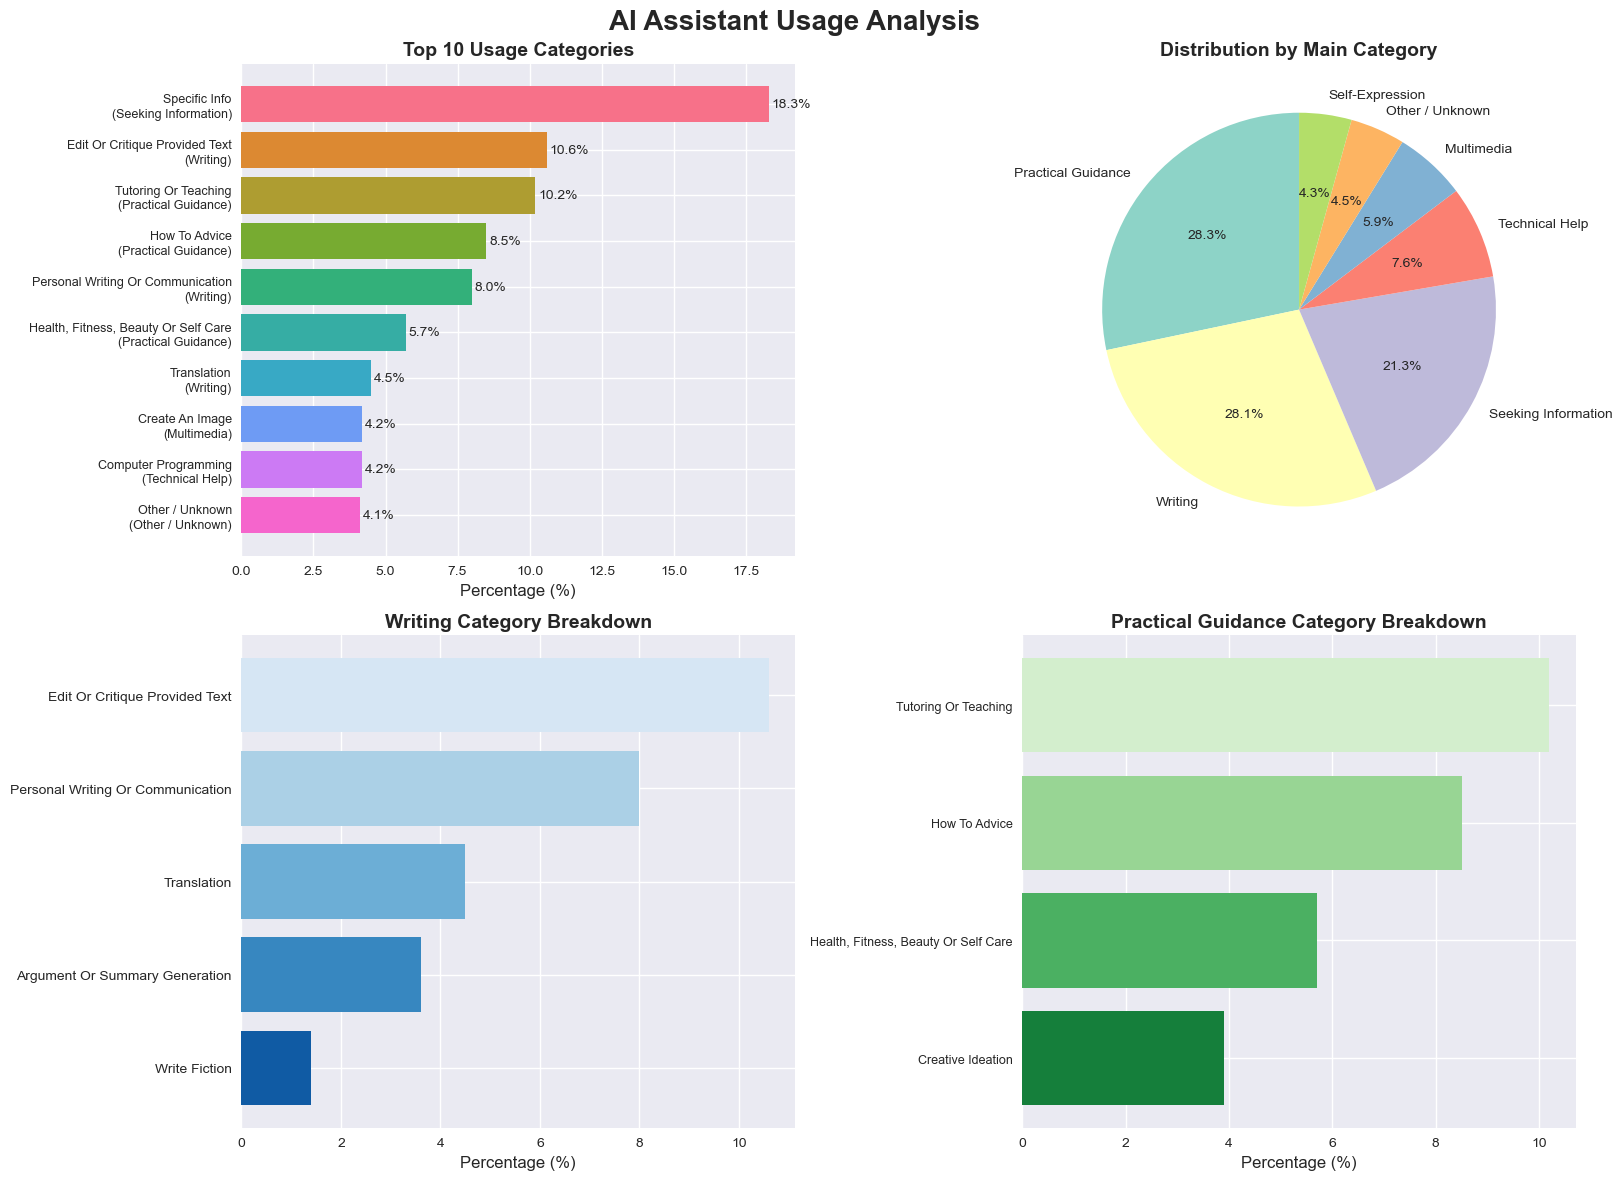

Chart saved as 'chart.png'


In [6]:
# Create a comprehensive chart with multiple visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('AI Assistant Usage Analysis', fontsize=20, fontweight='bold', y=0.98)

# 1. Top 10 Subcategories Bar Chart
top_10 = df.head(10)
colors = sns.color_palette("husl", len(top_10))
bars = ax1.barh(range(len(top_10)), top_10['Percentage_clean'], color=colors)
ax1.set_yticks(range(len(top_10)))
ax1.set_yticklabels([f"{row['Subcategory']}\n({row['Category']})" for _, row in top_10.iterrows()], fontsize=9)
ax1.set_xlabel('Percentage (%)', fontsize=12)
ax1.set_title('Top 10 Usage Categories', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

# Add percentage labels on bars
for i, (bar, pct) in enumerate(zip(bars, top_10['Percentage_clean'])):
    ax1.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}%', va='center', ha='left', fontsize=10)

# 2. Category Distribution Pie Chart
category_summary = df.groupby('Category')['Percentage_clean'].sum().sort_values(ascending=False)
colors_pie = sns.color_palette("Set3", len(category_summary))
wedges, texts, autotexts = ax2.pie(category_summary.values, labels=category_summary.index, 
                                  autopct='%1.1f%%', startangle=90, colors=colors_pie)
ax2.set_title('Distribution by Main Category', fontsize=14, fontweight='bold')

# 3. Writing Subcategories Detail
writing_data = df[df['Category'] == 'Writing'].sort_values('Percentage_clean', ascending=True)
ax3.barh(range(len(writing_data)), writing_data['Percentage_clean'], 
         color=sns.color_palette("Blues_r", len(writing_data)))
ax3.set_yticks(range(len(writing_data)))
ax3.set_yticklabels(writing_data['Subcategory'], fontsize=10)
ax3.set_xlabel('Percentage (%)', fontsize=12)
ax3.set_title('Writing Category Breakdown', fontsize=14, fontweight='bold')

# 4. Practical Guidance Subcategories Detail
practical_data = df[df['Category'] == 'Practical Guidance'].sort_values('Percentage_clean', ascending=True)
ax4.barh(range(len(practical_data)), practical_data['Percentage_clean'], 
         color=sns.color_palette("Greens_r", len(practical_data)))
ax4.set_yticks(range(len(practical_data)))
ax4.set_yticklabels(practical_data['Subcategory'], fontsize=9)
ax4.set_xlabel('Percentage (%)', fontsize=12)
ax4.set_title('Practical Guidance Category Breakdown', fontsize=14, fontweight='bold')

# Adjust layout and save
plt.tight_layout()
plt.savefig('chart.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("Chart saved as 'chart.png'")

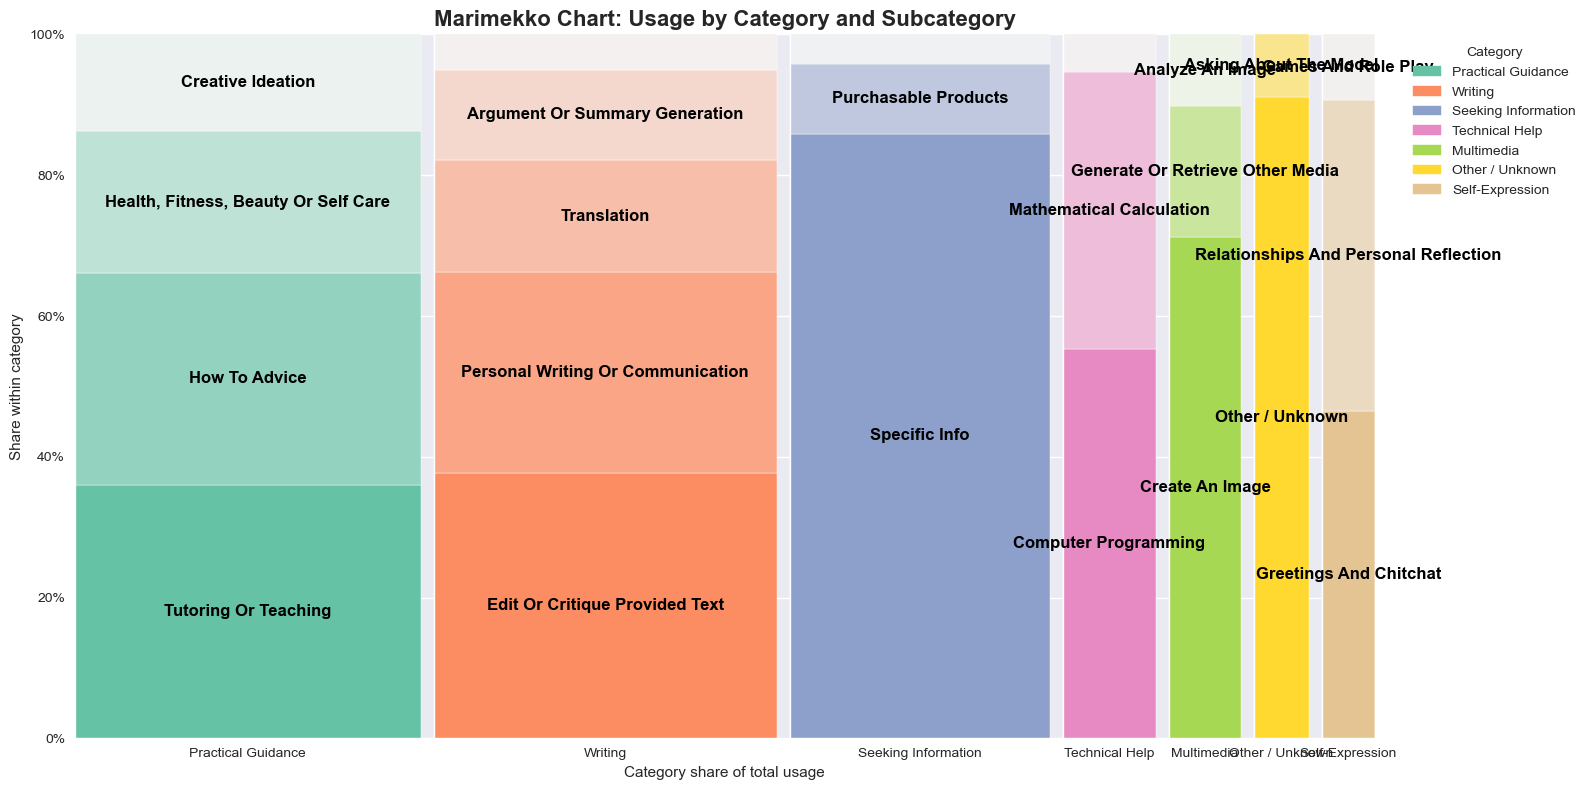

Marimekko chart saved as 'marimekko.png'


Sunburst saved as 'sunburst.html'


In [17]:
# Marimekko (Mosaic) chart: category widths = totals; stacks = within-category shares
cat_totals = df.groupby('Category')['Percentage_clean'].sum().sort_values(ascending=False)
total = cat_totals.sum()
raw_widths = cat_totals / total

# Add gaps between columns
n_cat = len(raw_widths)
gap = 0.01  # fraction of total width per gap
total_gap = gap * max(n_cat - 1, 0)
scale = max(0.0, 1.0 - total_gap)
widths = raw_widths * scale

fig, ax = plt.subplots(figsize=(16, 8))
x_left = 0.0
category_centers = []
category_edges = []

# Assign one base color per category (column)
base_palette = sns.color_palette('Set2', n_colors=n_cat)
category_colors = {cat: base_palette[i] for i, cat in enumerate(widths.index)}

for i, (cat, width) in enumerate(widths.items()):
    sub = df[df['Category'] == cat].sort_values('Percentage_clean', ascending=False)
    cat_total = cat_totals[cat]
    heights = sub['Percentage_clean'] / cat_total
    y_bottom = 0.0
    # Generate tints of the base color for subcategories (vary by intensity)
    tints = sns.light_palette(category_colors[cat], n_colors=max(len(sub), 3), reverse=True)
    tints = tints[:len(sub)]
    # Iterate rows with corresponding heights and tints
    for (label, h), tint in zip(sub[['Subcategory']].assign(h=heights)[['Subcategory','h']].itertuples(index=False, name=None), tints):
        if h <= 0:
            continue
        ax.bar(x_left, h, width=float(width), bottom=y_bottom, align='edge', color=tint, edgecolor='white')
        if h > 0.07:
            ax.text(x_left + float(width)/2, y_bottom + h/2, str(label), ha='center', va='center', fontsize=12, fontweight='bold', color='black')
        y_bottom += h
    category_centers.append(x_left + float(width)/2)
    category_edges.append(x_left)
    x_left += float(width)
    if i < n_cat - 1:
        x_left += gap
# rightmost edge
category_edges.append(x_left)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks(category_centers)
ax.set_xticklabels(widths.index, rotation=0, ha='center')
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([f'{int(y*100)}%' for y in np.linspace(0, 1, 6)])
ax.set_title('Marimekko Chart: Usage by Category and Subcategory', fontsize=16, fontweight='bold')
ax.set_xlabel('Category share of total usage')
ax.set_ylabel('Share within category')

# draw column separators at edges and gaps
for x in category_edges:
    ax.axvline(x, color='white', linewidth=1)

# add legend for categories (base colors)
handles = [plt.Rectangle((0,0),1,1, color=category_colors[cat]) for cat in widths.index]
ax.legend(handles, widths.index, title='Category', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

plt.tight_layout()
plt.savefig('marimekko.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("Marimekko chart saved as 'marimekko.png'")

# Interactive Sunburst chart
import plotly.express as px

if 'Percentage_clean' not in df.columns:
    df['Percentage_clean'] = df['Percentage'].str.replace('%', '').astype(float)

fig_sb = px.sunburst(
    df,
    path=['Category', 'Subcategory'],
    values='Percentage_clean',
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Bold,
    branchvalues='total',
    hover_data={'Percentage_clean': ':.1f'}
)
fig_sb.update_traces(
    textinfo='label+percent parent',
    hovertemplate='<b>%{label}</b><br>%{percentParent:.1%}<extra></extra>'
)
fig_sb.update_layout(
    title='Interactive Sunburst: Usage by Category and Subcategory',
    margin=dict(t=50, l=0, r=0, b=0)
)
fig_sb.show()
fig_sb.write_html('sunburst.html', include_plotlyjs='cdn', full_html=True)
print("Sunburst saved as 'sunburst.html'")

## Key Insights

In [7]:
print("=== KEY INSIGHTS ===")
print(f"\n1. DOMINANT CATEGORIES:")
for cat, pct in category_summary.head(3).items():
    print(f"   • {cat}: {pct:.1f}%")

print(f"\n2. TOP SINGLE USE CASE:")
top_use = df.iloc[0]
print(f"   • '{top_use['Subcategory']}' accounts for {top_use['Percentage']} of all usage")

print(f"\n3. WRITING vs PRACTICAL GUIDANCE:")
writing_total = df[df['Category'] == 'Writing']['Percentage_clean'].sum()
practical_total = df[df['Category'] == 'Practical Guidance']['Percentage_clean'].sum()
print(f"   • Writing tasks: {writing_total:.1f}%")
print(f"   • Practical Guidance: {practical_total:.1f}%")

print(f"\n4. LONG TAIL:")
bottom_10_total = df.tail(10)['Percentage_clean'].sum()
print(f"   • Bottom 10 categories combine for only {bottom_10_total:.1f}%")

print(f"\n5. TECHNICAL vs NON-TECHNICAL:")
technical_cats = ['Technical Help', 'Multimedia']
technical_total = df[df['Category'].isin(technical_cats)]['Percentage_clean'].sum()
print(f"   • Technical tasks: {technical_total:.1f}%")
print(f"   • Non-technical tasks: {100 - technical_total:.1f}%")

=== KEY INSIGHTS ===

1. DOMINANT CATEGORIES:
   • Practical Guidance: 28.3%
   • Writing: 28.1%
   • Seeking Information: 21.3%

2. TOP SINGLE USE CASE:
   • 'Specific Info' accounts for 18.30% of all usage

3. WRITING vs PRACTICAL GUIDANCE:
   • Writing tasks: 28.1%
   • Practical Guidance: 28.3%

4. LONG TAIL:
   • Bottom 10 categories combine for only 11.2%

5. TECHNICAL vs NON-TECHNICAL:
   • Technical tasks: 13.5%
   • Non-technical tasks: 86.5%
